In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("proj01.ipynb")

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import geopandas as gpd

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from ydata_profiling import ProfileReport

# Project 1: Regional GDP
### Regional Heterogeneity: Varying Economic Performance in US Counties
In the first project of Econ 148, we will examine county-level economic performance as measured by real Gross Domestic Product (GDP) over the past two decades. GDP is often analyzed at the country level; however, regional heterogeneity is also a crucial source of variation in growth and business cycle analysis. Therefore, in this project we will use a county-level real GDP dataset from the Bureau of Economic Analysis (BEA) to try to find out the regional differences in economic performance, especially during recessions.

You will use the data cleaning and data manipulation skills you have learned so far in this course to wrangle this rich, but rather complex, real-world dataset. 

#### Data sources: 

The main dataset we will use in this notebook is ["CAGDP9: Real GDP in Chained Dollars by County and MSA"](https://www.bea.gov/data/gdp/gdp-county-metro-and-other-areas) from the Bureau of Economic Analysis (BEA), accessed in January 2023. It provides a comprehensive measure of the gross domestic product of counties, metropolitan statistical areas, and some other local areas in the United States from 2001 to the present. *We use a subset of the full dataset (about 50%) that includes some of the industries available in the original dataset.*

We will also use the ["United States Counties Database"](https://simplemaps.com/data/us-counties) from Simplemaps.com, accessed Jun 2022. Specifically, we will use the geographic data of U.S. counties (i.e., latitude and longitude) to create the visualizations in the last section. 

### Learning Objectives: 
- Importing and exporting dataframes
- Metadata of a dataframe
- Recognizing and handling missing values and NaNs
- String methods and type conversions
- Grouping and aggregating
- Calculating changes and percentage changes
- Joining and merging two dataframes
- A demo of using Jupyter widgets

**A Note on Grading:**  
In Project 1, the autograded questions will have hidden tests, and the text-based free response questions will be graded on correctness. 

---
## Part 1: Importing dataset

Datasets are encoded in different codecs. In most cases, the default codex (utf-8) will be able to process the datasets. But in other cases, if we run into some issues with decoding (especially with datasets containing symbols or other languages), we can manually specify other codecs (e.g. ascii, latin-1). A complete list of codecs for Python 3.7 and newer can be found [here](https://docs.python.org/3.7/library/codecs.html#standard-encodings). 

As a side note, if we want to export the dataframe when we are done, we will also want to make sure that we are using the correct codecs.

For example, *some of you may not be able to import the real GDP dataset by BEA* with the default codecs (utf-8). You may get an error message like the one below.
```python
>>> rgdp = pd.read_csv("data/sample_CAGDP9__ALL_AREAS_2001_2021.csv")
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 137852: invalid continuation byte
```

**Question 1.1:** Import the dataset `data/sample_CAGDP9__ALL_AREAS_2001_2021.csv` using an alternative codec `latin-1`.

*Hint:* Look up the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) for `pd.read_csv` and see if there is any argument related to codec or encoding. 

Note: It's totally fine if you see a warning after you successfully import the dataset. This has to do with the content of this dataset.

In [3]:
rgdp_raw = pd.read_csv('data/sample_CAGDP9__ALL_AREAS_2001_2021.csv',low_memory=False,encoding='latin-1')
rgdp_raw

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"""00000""",United States,,CAGDP9,1.0,...,All industry total,Thousands of chained 2012 dollars,13263417000,13488357000,...,16253970000,16553348000,16932051000,17390295000,17680274000,18076651000,18609078000,19036052000,18509143000,19609812000
1,"""00000""",United States,,CAGDP9,2.0,...,Private industries,Thousands of chained 2012 dollars,11452473000,11651910000,...,14094484000,14359460000,14745226000,15197800000,15468414000,15836844000,16342836000,16758341000,16231067000,17315919000
2,"""00000""",United States,,CAGDP9,3.0,11,"Agriculture, forestry, fishing and hunting",Thousands of chained 2012 dollars,154754000,160443000,...,178689000,207512000,208573000,221860000,234553000,229699000,236188000,222275000,228581000,209202000
3,"""00000""",United States,,CAGDP9,6.0,21,"Mining, quarrying, and oil and gas extraction",Thousands of chained 2012 dollars,272249000,279759000,...,360523000,374021000,414501000,451234000,427227000,433421000,438670000,493805000,488336000,408927000
4,"""00000""",United States,,CAGDP9,10.0,22,Utilities,Thousands of chained 2012 dollars,214832000,222238000,...,280650000,277156000,266289000,266387000,280734000,283583000,282629000,283813000,294152000,282202000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47669,"""98000""",Far West,8,CAGDP9,83.0,...,Government and government enterprises,Thousands of chained 2012 dollars,360480137,367620124,...,387542344,387064870,393704832,401470432,412827803,415425140,419192794,423192028,419443164,424264526
47670,Note: See the included footnote file.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47671,CAGDP9: Real GDP by county and metropolitan ar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47672,"Last updated: December 8, 2022 -- new statisti...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2:** We notice that the last four rows in `rgdp_raw` are just some footnotes, so we will drop them. To do so, you can either select the top 47670 rows for the data that we want, or you can drop the bottom 4 rows with [`pandas.DataFrame.drop`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html). Assign the modified dataframe to `rgdp`. 

In [5]:
rgdp = rgdp_raw.drop(rgdp_raw.tail(4).index)
rgdp

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"""00000""",United States,,CAGDP9,1.0,...,All industry total,Thousands of chained 2012 dollars,13263417000,13488357000,...,16253970000,16553348000,16932051000,17390295000,17680274000,18076651000,18609078000,19036052000,18509143000,19609812000
1,"""00000""",United States,,CAGDP9,2.0,...,Private industries,Thousands of chained 2012 dollars,11452473000,11651910000,...,14094484000,14359460000,14745226000,15197800000,15468414000,15836844000,16342836000,16758341000,16231067000,17315919000
2,"""00000""",United States,,CAGDP9,3.0,11,"Agriculture, forestry, fishing and hunting",Thousands of chained 2012 dollars,154754000,160443000,...,178689000,207512000,208573000,221860000,234553000,229699000,236188000,222275000,228581000,209202000
3,"""00000""",United States,,CAGDP9,6.0,21,"Mining, quarrying, and oil and gas extraction",Thousands of chained 2012 dollars,272249000,279759000,...,360523000,374021000,414501000,451234000,427227000,433421000,438670000,493805000,488336000,408927000
4,"""00000""",United States,,CAGDP9,10.0,22,Utilities,Thousands of chained 2012 dollars,214832000,222238000,...,280650000,277156000,266289000,266387000,280734000,283583000,282629000,283813000,294152000,282202000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47665,"""98000""",Far West,8,CAGDP9,50.0,"52, 53","Finance, insurance, real estate, rental, and...",Thousands of chained 2012 dollars,438744630,445757133,...,573448998,577263288,578195892,576969186,576901516,591593881,609356664,622291614,615010875,652231372
47666,"""98000""",Far West,8,CAGDP9,68.0,"61, 62","Educational services, health care, and socia...",Thousands of chained 2012 dollars,148800299,157701553,...,225303862,229433800,235119180,246932447,257158738,264615951,274786678,285453129,281918346,297715158
47667,"""98000""",Far West,8,CAGDP9,75.0,"71, 72","Arts, entertainment, recreation, accommodati...",Thousands of chained 2012 dollars,123539017,128169215,...,139067893,142496357,150026335,156121019,160253653,165026186,168761597,172980429,120869152,157662283
47668,"""98000""",Far West,8,CAGDP9,82.0,81,Other services (except government and govern...,Thousands of chained 2012 dollars,70032062,72058322,...,60720464,60359278,62453812,63122686,62972203,64243303,65930725,66024183,56760109,61253442


In [6]:
grader.check("q1_2")

q1_2 results: All test cases passed!

---
## Part 2: Learn about the dataset

Like we did in Lab 3, one of the first things that we will do with our dataset is to learn about its structure: how many rows and columns are there in the dataset? What values does each column store? What is the data type for each column (int, string, etc.)? For categorical variables, what are unique values? For numerical variables, what is the mean, median, min, and max? 

In this section, we will use the built-in functions in Pandas to quickly answer the question above. 

**Question 2.1:** How many rows and columns are there in this dataframe `rgdp`? Assign the number of rows to `N_rows` and the number of columns to `N_cols`. 

Hint: The first section of lab 3 can be a good reference. 

In [7]:
N_rows = rgdp.shape[0]
N_cols = rgdp.shape[1]
N_rows, N_cols

(47670, 29)

In [8]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2:** How many unique GeoFIPS codes are there in this dataframe `rgdp`? Assign the number of unique counties to `N_unique_geofips`. 

In [9]:
N_unique_geofips = rgdp['GeoFIPS'].nunique()
N_unique_geofips

3178

In [10]:
grader.check("q2_2")

q2_2 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.3:** What do the values in the "Description" column represent? Are the categories in the "Description" column mutually exclusive, or are they potentially subsets of each other? Give an example to illustrate your point. 

In [11]:
print(rgdp['Description'].unique())

['All industry total' ' Private industries'
 '  Agriculture, forestry, fishing and hunting'
 '  Mining, quarrying, and oil and gas extraction' '  Utilities'
 '  Construction' '  Manufacturing' '  Wholesale trade' '  Retail trade'
 '  Transportation and warehousing'
 '  Finance, insurance, real estate, rental, and leasing'
 '  Educational services, health care, and social assistance'
 '  Arts, entertainment, recreation, accommodation, and food services'
 '  Other services (except government and government enterprises)'
 'Government and government enterprises']


It is seen from the array above how the first listed value is **All industry total**. This means the column cannot be mutually exclusive as this column is the sum of all the other categories in the description. The remaining descriptions, however, seem to be mutually exclusive.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.4:** What are the data types of columns `GeoFIPS`, `GeoName`, `Unit`, and `2021`? Are they integers, floats, strings, objects, or mixed types? Do you find any data types in these columns problematic? Why?

*Hint:* Look into `df.dtypes`. 

In [12]:
rgdp[['GeoFIPS','GeoName','Unit','2021']].dtypes

GeoFIPS    object
GeoName    object
Unit       object
2021       object
dtype: object

From the code above, it is apparent that the columns `GeoFIPS`, `GeoName`, `Unit`, and `2021` are all type objects. This could be problematic, as, for example, the GDP data in `2021` should be either integer or float. Additionally, we should store the others as strings for performance, which uses less memory.

<!-- END QUESTION -->

### (Optional) Exploratory Data Anaylsis with ydata_profiling

In addition, we can also rely on other wonderful python packages to get a big picture of our dataset. As an example, the [ydata_profiling](https://docs.profiling.ydata.ai/latest/) package "generates profile reports from a pandas DataFrame. The pandas `df.describe()` function is handy yet a little basic for exploratory data analysis. ydata_profiling extends pandas DataFrame with `df.profile_report()`, which automatically generates a standardized univariate and multivariate report for data understanding." 

In a way, ydata_profiling can do most of the exploratory data analysis tasks and create a comprehensive and beautiful report for you within a minute. 

Copy the following code to a code cell and run it to see the report generated by pandas-profiling if you have the package installed. You can install pandas-profiling by running `!pip install ydata_profiling` (see documentation [here](https://pypi.org/project/pandas-profiling/)). 

```python
from ydata_profiling import ProfileReport
profile = ProfileReport(rgdp, title="Pandas Profiling Report")
profile
```

The above code might error due to package issues on our end. If that happens, try loading in the data in a [Google collaboratory notebook](https://colab.google/) and running it there - it should work there!

In [13]:
# profile = ProfileReport(rgdp, title="Pandas Profiling Report")
# profile

---
## Part 3: Missing Values and NaNs

The difference between the data found in many tutorials and real-world data is that real-world data is rarely clean and homogeneous. In particular, many interesting datasets will have some amount of missing data. To complicate matters, different data sources may report missing data in different ways.

In our dataset, there are two types of 'missing values': (D) and (NA). Let's see how they look like.

In [14]:
rgdp[rgdp["2001"] == "(D)"][:5]

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
67,"""01005""","Barbour, AL",5,CAGDP9,34.0,42,Wholesale trade,Thousands of chained 2012 dollars,(D),(D),...,(D),(D),(D),(D),(D),(D),(D),(D),(D),(D)
72,"""01005""","Barbour, AL",5,CAGDP9,75.0,"71, 72","Arts, entertainment, recreation, accommodati...",Thousands of chained 2012 dollars,(D),18441,...,15089,15483,15359,15100,15430,16058,15660,16783,15562,16773
82,"""01007""","Bibb, AL",5,CAGDP9,34.0,42,Wholesale trade,Thousands of chained 2012 dollars,(D),(D),...,(D),20109,23033,26327,27566,39671,38772,(D),(D),(D)
99,"""01009""","Blount, AL",5,CAGDP9,36.0,48-49,Transportation and warehousing,Thousands of chained 2012 dollars,(D),(D),...,(D),(D),(D),(D),(D),(D),(D),(D),(D),(D)
110,"""01011""","Bullock, AL",5,CAGDP9,11.0,23,Construction,Thousands of chained 2012 dollars,(D),(D),...,(D),(D),(D),(D),(D),(D),(D),(D),(D),(D)


In [15]:
rgdp[rgdp["2001"] == "(NA)"][:5]

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1125,"""02063""","Chugach Census Area, AK*",8,CAGDP9,1.0,...,All industry total,Thousands of chained 2012 dollars,(NA),(NA),...,(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA)
1126,"""02063""","Chugach Census Area, AK*",8,CAGDP9,2.0,...,Private industries,Thousands of chained 2012 dollars,(NA),(NA),...,(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA)
1127,"""02063""","Chugach Census Area, AK*",8,CAGDP9,3.0,11,"Agriculture, forestry, fishing and hunting",Thousands of chained 2012 dollars,(NA),(NA),...,(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA)
1128,"""02063""","Chugach Census Area, AK*",8,CAGDP9,6.0,21,"Mining, quarrying, and oil and gas extraction",Thousands of chained 2012 dollars,(NA),(NA),...,(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA)
1129,"""02063""","Chugach Census Area, AK*",8,CAGDP9,10.0,22,Utilities,Thousands of chained 2012 dollars,(NA),(NA),...,(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA)


<!-- BEGIN QUESTION -->

**Question 3.1:** Look up the [footnote](https://www.econ148.org/sp23/resources/assets/supp_materials/proj01/CAGDP9__Footnotes.html) of this dataset, what does each of these two types of missing values represent? What do you think is a good way to handle these two types of missing values respectively? This is an open-ended question. 

The values marked **(D)** are _not shown to avoid disclosure of confidential information_ but _estimates are included in higher-level totals_. From the excerpt, there is no clear trend in the missing values; it is only some industry classifications for some areas. My guess is that only a few companies work within that industry, data on the companies could be inferred from the data.
Values marked with **(NA)**, on the other hand, are not available. Here, from the excerpt, this is often a location where no data is available.

If we do not need data on such a granular level, we could drop rows marked **(D)**, while for the **(NA)**, we could either estimate them from other similar areas or drop them.
If we want to analyze at a more granular level, the more appropriate thing could be to drop the entire area if it contains **(D)** or **(NA)** values. This way, the missing values will not mess with any analysis. The other solution could again be to estimate their value from similar areas. However, this would, at best, be a qualified guess.

<!-- END QUESTION -->

**Question 3.2:** For the sake of simplicity, simply drop all rows that contain missing values (either (D) or (NA)) for this project. 

*Note:* This is not good practice, do not do this in the real world.


In [16]:
rgdp_no_nans = rgdp.copy()
rgdp_no_nans = rgdp_no_nans.replace({"(D)":np.nan,"(NA)":np.nan}).dropna().reset_index(drop=True)
rgdp_no_nans

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"""00000""",United States,,CAGDP9,1.0,...,All industry total,Thousands of chained 2012 dollars,13263417000,13488357000,...,16253970000,16553348000,16932051000,17390295000,17680274000,18076651000,18609078000,19036052000,18509143000,19609812000
1,"""00000""",United States,,CAGDP9,2.0,...,Private industries,Thousands of chained 2012 dollars,11452473000,11651910000,...,14094484000,14359460000,14745226000,15197800000,15468414000,15836844000,16342836000,16758341000,16231067000,17315919000
2,"""00000""",United States,,CAGDP9,3.0,11,"Agriculture, forestry, fishing and hunting",Thousands of chained 2012 dollars,154754000,160443000,...,178689000,207512000,208573000,221860000,234553000,229699000,236188000,222275000,228581000,209202000
3,"""00000""",United States,,CAGDP9,6.0,21,"Mining, quarrying, and oil and gas extraction",Thousands of chained 2012 dollars,272249000,279759000,...,360523000,374021000,414501000,451234000,427227000,433421000,438670000,493805000,488336000,408927000
4,"""00000""",United States,,CAGDP9,10.0,22,Utilities,Thousands of chained 2012 dollars,214832000,222238000,...,280650000,277156000,266289000,266387000,280734000,283583000,282629000,283813000,294152000,282202000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34201,"""98000""",Far West,8,CAGDP9,50.0,"52, 53","Finance, insurance, real estate, rental, and...",Thousands of chained 2012 dollars,438744630,445757133,...,573448998,577263288,578195892,576969186,576901516,591593881,609356664,622291614,615010875,652231372
34202,"""98000""",Far West,8,CAGDP9,68.0,"61, 62","Educational services, health care, and socia...",Thousands of chained 2012 dollars,148800299,157701553,...,225303862,229433800,235119180,246932447,257158738,264615951,274786678,285453129,281918346,297715158
34203,"""98000""",Far West,8,CAGDP9,75.0,"71, 72","Arts, entertainment, recreation, accommodati...",Thousands of chained 2012 dollars,123539017,128169215,...,139067893,142496357,150026335,156121019,160253653,165026186,168761597,172980429,120869152,157662283
34204,"""98000""",Far West,8,CAGDP9,82.0,81,Other services (except government and govern...,Thousands of chained 2012 dollars,70032062,72058322,...,60720464,60359278,62453812,63122686,62972203,64243303,65930725,66024183,56760109,61253442


In [17]:
grader.check("q3_2")

q3_2 results: All test cases passed!

---
## Part 4: Type conversions and string methods

In part 2, we noticed that the dataframe we are working with does not have the desired data types for many columns. For example, the real GDP data has some entries that are kept as strings. To convert these entries to the desired data types, the most common way is to use [`pandas.DataFrame.astype(type)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html). 

For example, we can convert the column "2001" from strings to integers using `astype("int64")`.

In [18]:
rgdp_no_nans["2001"]

0        13263417000
1        11452473000
2          154754000
3          272249000
4          214832000
            ...     
34201      438744630
34202      148800299
34203      123539017
34204       70032062
34205      360480137
Name: 2001, Length: 34206, dtype: object

In [19]:
rgdp_no_nans["2001"].astype("int64")

0        13263417000
1        11452473000
2          154754000
3          272249000
4          214832000
            ...     
34201      438744630
34202      148800299
34203      123539017
34204       70032062
34205      360480137
Name: 2001, Length: 34206, dtype: int64

It is good practice to perform your data cleaning on a copy of the original dataset, so you can always reference the original dataset if necessary. We create this copy below.

In [20]:
rgdp_clean = rgdp_no_nans.copy()

**Question 4.1:** Write a for-loop that converts all values in the `rgdp_clean` columns ranging from `2001` to `2021`  to `int64`. 

*Hint:* Be careful when accessing the column labels, they are strings.

In [21]:
for year in range(2001,2022):
    rgdp_clean[str(year)] = rgdp_clean[str(year)].astype("int64")

In [22]:
grader.check("q4_1")

q4_1 results: All test cases passed!

In [23]:
# check to see if the data types are correct now
rgdp_clean.dtypes

GeoFIPS                    object
GeoName                    object
Region                     object
TableName                  object
LineCode                  float64
IndustryClassification     object
Description                object
Unit                       object
2001                        int64
2002                        int64
2003                        int64
2004                        int64
2005                        int64
2006                        int64
2007                        int64
2008                        int64
2009                        int64
2010                        int64
2011                        int64
2012                        int64
2013                        int64
2014                        int64
2015                        int64
2016                        int64
2017                        int64
2018                        int64
2019                        int64
2020                        int64
2021                        int64
dtype: object

Now we can see the `dtype` for 2001-2021 are `int64`.  

We can also convert data type into `float`, `str`, etc. using the `astype` method on the entire dataframe or some specified data series. Pandas also provides a [`pandas.to_numeric()`](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html) function to easier convert different data types into numeric. 

In [24]:
# convert LineCode to int64
rgdp_clean["LineCode"] = rgdp_clean["LineCode"].astype("int64")

### Regular Expressions and Strings

But sometimes the data entries require some manipulation before can be converted to the desirable data types easily. For example, entries in the `GeoFIPS` column in our dataset has the following form. 

In [25]:
rgdp_no_nans["GeoFIPS"]

0         "00000"
1         "00000"
2         "00000"
3         "00000"
4         "00000"
           ...   
34201     "98000"
34202     "98000"
34203     "98000"
34204     "98000"
34205     "98000"
Name: GeoFIPS, Length: 34206, dtype: object

Note that the parentheses are there in the data, so simple conversion like `astype(int)` will fail.

In [26]:
# this will produce an error
# rgdp_no_nans["GeoFIPS"].astype("int64")

To extract relevant information, we will use regular expressions. A regular expression is a sequence of characters that specifies a search pattern in text. Usually such patterns are used by string-searching algorithms for "find" or "find and replace" operations on strings, or for input validation.

For example, we can extract student ID among a bunch of other texts. 

In [27]:
some_text = "Name: Oski, Age: 999, SID: 12345678"
re.findall("SID: (\d*)", some_text)

['12345678']

Or we can replace some text we want. 

In [28]:
some_other_text = "Stanford is the No.1 university in California. "
re.sub("Stanford", "UC Berkeley", some_other_text)

'UC Berkeley is the No.1 university in California. '

Note that a common way to get rid of texts in a specified pattern is to use [`re.sub`](https://docs.python.org/3/library/re.html#re.sub) and replace the pattern with the empty strings. For example: 

In [29]:
some_messy_text = "UoskiC Beroskikeleoskiy oskiis oskitheoski No.1oski univoskiersioskity ioskin Calioskifooskirnia."
re.sub("oski", "", some_messy_text) # substitute with the empty string

'UC Berkeley is the No.1 university in California.'

Regular expression is a deep topic and it requires practice to be able to use it well. A well-known website to test if your regular expression works or not is [regex101](https://regex101.com/). It will be very helpful skill in terms of data cleaning. But for now, we will just use it to get rid of the parentheses in data entries in the `GeoFIPS` column. 

**Question 4.2:** Remove all instances of quotation marks from `too_many_quotation_marks` using regular expressions. 

In [30]:
too_many_quotation_marks = 'U"C B"er"kel"ey i"s t"he" No".1 u"niv"ersity i"n C"ali"fo"rn"i"a.'
no_quotation_marks = re.sub('"', '', too_many_quotation_marks)
no_quotation_marks

'UC Berkeley is the No.1 university in California.'

In [31]:
grader.check("q4_2")

q4_2 results: All test cases passed!

To apply regex and many other string method to a dataframe, we can use `pandas.Series.str` methods, and apply a string function. In our case [`pandas.Series.str.replace`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html) that can replace each occurrence of pattern/regex in the Series/Index. 


**Question 4.3:** Write the code below that first delete all the quotation marks in values in the `GeoFIPS` column in `rgdp_clean` with [`pandas.Series.str.replace`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html) and then convert all strings into integers using `astype('int64')`.

In [32]:
rgdp_clean["GeoFIPS"] = rgdp_clean["GeoFIPS"].replace('"', '',regex=True).astype("int64")
rgdp_clean

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0,United States,,CAGDP9,1,...,All industry total,Thousands of chained 2012 dollars,13263417000,13488357000,...,16253970000,16553348000,16932051000,17390295000,17680274000,18076651000,18609078000,19036052000,18509143000,19609812000
1,0,United States,,CAGDP9,2,...,Private industries,Thousands of chained 2012 dollars,11452473000,11651910000,...,14094484000,14359460000,14745226000,15197800000,15468414000,15836844000,16342836000,16758341000,16231067000,17315919000
2,0,United States,,CAGDP9,3,11,"Agriculture, forestry, fishing and hunting",Thousands of chained 2012 dollars,154754000,160443000,...,178689000,207512000,208573000,221860000,234553000,229699000,236188000,222275000,228581000,209202000
3,0,United States,,CAGDP9,6,21,"Mining, quarrying, and oil and gas extraction",Thousands of chained 2012 dollars,272249000,279759000,...,360523000,374021000,414501000,451234000,427227000,433421000,438670000,493805000,488336000,408927000
4,0,United States,,CAGDP9,10,22,Utilities,Thousands of chained 2012 dollars,214832000,222238000,...,280650000,277156000,266289000,266387000,280734000,283583000,282629000,283813000,294152000,282202000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34201,98000,Far West,8,CAGDP9,50,"52, 53","Finance, insurance, real estate, rental, and...",Thousands of chained 2012 dollars,438744630,445757133,...,573448998,577263288,578195892,576969186,576901516,591593881,609356664,622291614,615010875,652231372
34202,98000,Far West,8,CAGDP9,68,"61, 62","Educational services, health care, and socia...",Thousands of chained 2012 dollars,148800299,157701553,...,225303862,229433800,235119180,246932447,257158738,264615951,274786678,285453129,281918346,297715158
34203,98000,Far West,8,CAGDP9,75,"71, 72","Arts, entertainment, recreation, accommodati...",Thousands of chained 2012 dollars,123539017,128169215,...,139067893,142496357,150026335,156121019,160253653,165026186,168761597,172980429,120869152,157662283
34204,98000,Far West,8,CAGDP9,82,81,Other services (except government and govern...,Thousands of chained 2012 dollars,70032062,72058322,...,60720464,60359278,62453812,63122686,62972203,64243303,65930725,66024183,56760109,61253442


In [33]:
grader.check("q4_3")

q4_3 results: All test cases passed!

In [34]:
rgdp_clean.dtypes

GeoFIPS                    int64
GeoName                   object
Region                    object
TableName                 object
LineCode                   int64
IndustryClassification    object
Description               object
Unit                      object
2001                       int64
2002                       int64
2003                       int64
2004                       int64
2005                       int64
2006                       int64
2007                       int64
2008                       int64
2009                       int64
2010                       int64
2011                       int64
2012                       int64
2013                       int64
2014                       int64
2015                       int64
2016                       int64
2017                       int64
2018                       int64
2019                       int64
2020                       int64
2021                       int64
dtype: object

Now everything should be the correct data type.

---
## Part 5: Pivot tables and melt

You should be familiar with pivot tables from data 8; feel free to review them [here](https://www.data8.org/interactive_table_functions/) if you like. Implementing pivot tables in pandas is fairly similar to implementing them in the datascience package, look at the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html). Looking at our dataset, it seems like it's already pivoted. So, we would like to introduce you to `.melt()`, which is essentially just the inverse of the pivot table.

Many economic datasets are in 'spreadsheet' formats, which have groups of columns representing the same type of information. For example, in our real GDP dataframe, columns like `2001`, `2002` simply give the real GDP values in the given year. To make our lives easier when working with the data later, we can convert this pivoted dataframe to a more traditional dataframe, where all data are in just one column. We can use [`pandas.melt`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to do this (in other languages like Stata, this would be called as converting from a wide to a long format).

**Question 5.1:** Convert the dataframe using [`pandas.melt`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) so that it contains seven columns: `GeoFIPS`, `GeoName`, `Region`, `LineCode`, `Description`, `year`, and `value`. The `value` column should contain the real GDP value for the given region, industry, and year on that row. 

The first 5 rows of what your resulting dataframe should look like have been provided below in `samp_df`. There are no hidden tests for this question.

In [35]:
sample_data = {
    'GeoFIPS': [0, 0, 0, 0, 0],
    'GeoName': ['United States', 'United States', 'United States', 'United States', 'United States'],
    'Region': [" "," ", " "," ", " "],
    'LineCode': [1.0, 2.0, 3.0, 6.0, 10.0],
    'Description': ['All industry total', 'Private industries', 'Agriculture, forestry, fishing and hunting',
                    'Mining, quarrying, and oil and gas extraction', 'Utilities'],
    'year': [2001, 2001, 2001, 2001, 2001],
    'value': [13263417000, 11452473000, 154754000, 272249000, 214832000]
}

samp_df = pd.DataFrame(sample_data)
samp_df

,GeoFIPS,GeoName,Region,LineCode,Description,year,value
0,0,United States,,1.0,All industry total,2001,13263417000
1,0,United States,,2.0,Private industries,2001,11452473000
2,0,United States,,3.0,"Agriculture, forestry, fishing and hunting",2001,154754000
3,0,United States,,6.0,"Mining, quarrying, and oil and gas extraction",2001,272249000
4,0,United States,,10.0,Utilities,2001,214832000


In [36]:
rgdp_melted = pd.melt(rgdp_clean, 
                      id_vars=["GeoFIPS", "GeoName", "Region", "LineCode", "Description"], 
                      # id_vars should be the five columns you want to keep the same from rgdp_clean 
                      # (aka the columns you don't want to unpivot)
                      value_vars=[str(year) for year in range(2001,2022)]
                      # value_vars should be the columns you want to combine, or unpivot
                     ).rename(columns={"variable": "year"}) 
rgdp_melted

,GeoFIPS,GeoName,Region,LineCode,Description,year,value
0,0,United States,,1,All industry total,2001,13263417000
1,0,United States,,2,Private industries,2001,11452473000
2,0,United States,,3,"Agriculture, forestry, fishing and hunting",2001,154754000
3,0,United States,,6,"Mining, quarrying, and oil and gas extraction",2001,272249000
4,0,United States,,10,Utilities,2001,214832000
...,...,...,...,...,...,...,...
718321,98000,Far West,8,50,"Finance, insurance, real estate, rental, and...",2021,652231372
718322,98000,Far West,8,68,"Educational services, health care, and socia...",2021,297715158
718323,98000,Far West,8,75,"Arts, entertainment, recreation, accommodati...",2021,157662283
718324,98000,Far West,8,82,Other services (except government and govern...,2021,61253442


In [37]:
grader.check("q5_1")

q5_1 results: All test cases passed!

Now, all the real GDP values are in just one column. 

**Question 5.2:** One issue remains: the `year` column has data type as strings. Convert the column into `int64`.

In [38]:
rgdp_melted["year"] = rgdp_melted["year"].astype("int64")
rgdp_melted["year"]

0         2001
1         2001
2         2001
3         2001
4         2001
          ... 
718321    2021
718322    2021
718323    2021
718324    2021
718325    2021
Name: year, Length: 718326, dtype: int64

In [39]:
grader.check("q5_2")

q5_2 results: All test cases passed!

As we are only concerned about the *county-level* GDP data, we will filter `rgdp_melted` for only the relevant data. Some entries in the dataframe represent state aggregates or national aggregate, and these entries will have a GeoFIPS ending in 000. For example, the code of 00000 represents the entire US; 01000 represents the Alabama state; 01001 represents Autauga--a county in Alabama. 

**Question 5.3:** Filter the `rgdp_melted` dataframe for rows that contain real GDP data for **only counties (not aggregates)**. Assign the filtered dataframe to `rgdp_county`. 

*Hint:* You can get the remainder of a division using the modulo operator % in Python. 

In [40]:
rgdp_county = rgdp_melted[rgdp_melted["GeoFIPS"]%1000 != 0].reset_index(drop=True)
rgdp_county["Region"] = rgdp_county["Region"].astype(int) # we can finally do this!
rgdp_county

,GeoFIPS,GeoName,Region,LineCode,Description,year,value
0,1001,"Autauga, AL",5,1,All industry total,2001,949800
1,1001,"Autauga, AL",5,2,Private industries,2001,811076
2,1001,"Autauga, AL",5,3,"Agriculture, forestry, fishing and hunting",2001,22455
3,1001,"Autauga, AL",5,6,"Mining, quarrying, and oil and gas extraction",2001,4644
4,1001,"Autauga, AL",5,10,Utilities,2001,23121
...,...,...,...,...,...,...,...
699421,56045,"Weston, WY",7,35,Retail trade,2021,12944
699422,56045,"Weston, WY",7,36,Transportation and warehousing,2021,12549
699423,56045,"Weston, WY",7,50,"Finance, insurance, real estate, rental, and...",2021,39114
699424,56045,"Weston, WY",7,82,Other services (except government and govern...,2021,2881


In [41]:
grader.check("q5_3")

q5_3 results: All test cases passed!

**Question 5.4** Now filter the `rgdp_county` dataframe for rows that contain **all industry total** real GDP data for only counties (not aggregates). Assign the filtered dataframe to `rgdp_county_allindustry`, then drop the column `Description`. So in the end `rgdp_county_allindustry` dataframe should have six columns: `GeoFIPS`, `GeoName`, `Region`, `LineCode`, `year`, and `value`. 

In [42]:
display(rgdp_county.groupby(["LineCode","Description"]).first())

,,GeoFIPS,GeoName,Region,year,value
LineCode,Description,,,,,
1,All industry total,1001,"Autauga, AL",5,2001,949800
2,Private industries,1001,"Autauga, AL",5,2001,811076
3,"Agriculture, forestry, fishing and hunting",1001,"Autauga, AL",5,2001,22455
6,"Mining, quarrying, and oil and gas extraction",1001,"Autauga, AL",5,2001,4644
10,Utilities,1001,"Autauga, AL",5,2001,23121
11,Construction,1001,"Autauga, AL",5,2001,111710
12,Manufacturing,1001,"Autauga, AL",5,2001,211416
34,Wholesale trade,1001,"Autauga, AL",5,2001,22902
35,Retail trade,1001,"Autauga, AL",5,2001,93043


In [43]:
rgdp_county_allindustry = rgdp_county[rgdp_county['LineCode'] == 1].reset_index(drop=True)[["GeoFIPS","GeoName","Region","LineCode","year","value"]]
rgdp_county_allindustry

,GeoFIPS,GeoName,Region,LineCode,year,value
0,1001,"Autauga, AL",5,1,2001,949800
1,1003,"Baldwin, AL",5,1,2001,4007706
2,1005,"Barbour, AL",5,1,2001,812751
3,1007,"Bibb, AL",5,1,2001,292495
4,1009,"Blount, AL",5,1,2001,810054
...,...,...,...,...,...,...
65221,56037,"Sweetwater, WY",7,1,2021,3125840
65222,56039,"Teton, WY",7,1,2021,2862327
65223,56041,"Uinta, WY",7,1,2021,771851
65224,56043,"Washakie, WY",7,1,2021,346859


In [44]:
grader.check("q5_4")

q5_4 results: All test cases passed!

Now we have our dataframe consisting of county-level real GDP data of all industries total. 

---
## Part 6: Groupby

Groupby's are useful for aggregating data across certain categories. When we use a groupby, we essentially split the Pandas dataframe into smaller subframes (one subframe for each group) and perform aggregation functions on each subframe, outputting one dataframe with the result of the aggregation function on all subframes. Pandas offers several built-in aggregation functions, but we can also choose to define our own if we wish. 

**Question 6.1:** Find the annual average GDP for all industries across all US counties. Assign the result to `rgdp_county_allindustry_mean`. This dataframe should only have two columns: `year` and `value`. 

*Hint:* `pandas.Dataframe.groupby` may be helpful. 

In [45]:
rgdp_county_allindustry_mean = rgdp_county_allindustry[["year","value"]].groupby(["year"]).mean().reset_index()
rgdp_county_allindustry_mean.head()

,year,value
0,2001,4.304018e+06
1,2002,4.380728e+06
2,2003,4.492003e+06
3,2004,4.661117e+06
4,2005,4.821209e+06


In [46]:
grader.check("q6_1")

q6_1 results: All test cases passed!

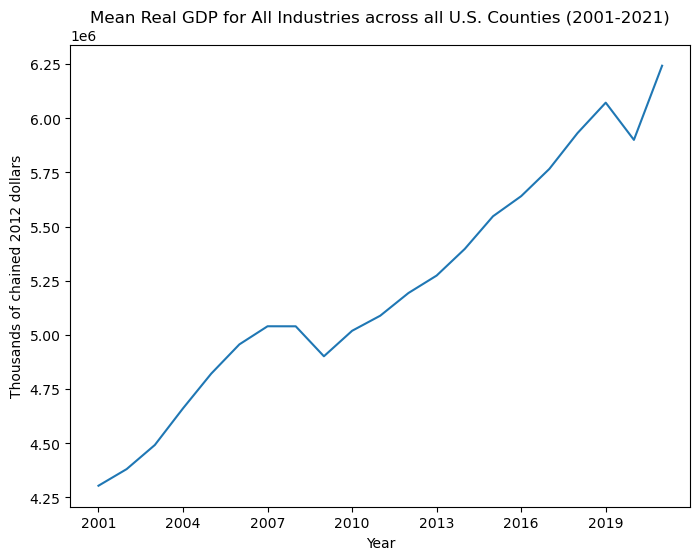

In [47]:
plt.figure(figsize=(8, 6))
plt.plot(rgdp_county_allindustry_mean["year"], rgdp_county_allindustry_mean["value"])
plt.xticks(np.arange(2001, 2022, 3))
plt.xlabel("Year")
plt.ylabel("Thousands of chained 2012 dollars")
plt.title("Mean Real GDP for All Industries across all U.S. Counties (2001-2021)");

**Question 6.2:** Repeat the same process as above, but for median GDP instead.

In [48]:
rgdp_county_allindustry_median = rgdp_county_allindustry[["year","value"]].groupby(["year"]).median().reset_index()
rgdp_county_allindustry_median.head()

,year,value
0,2001,763212.5
1,2002,783678.0
2,2003,789646.5
3,2004,825469.0
4,2005,839073.5


In [49]:
grader.check("q6_2")

q6_2 results: All test cases passed!

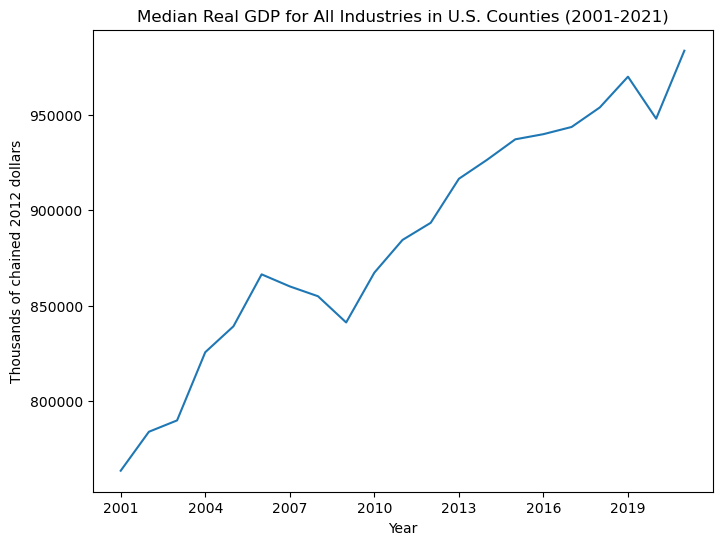

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(rgdp_county_allindustry_median["year"], rgdp_county_allindustry_median["value"])
plt.xticks(np.arange(2001, 2022, 3))
plt.xlabel("Year")
plt.ylabel("Thousands of chained 2012 dollars")
plt.title("Median Real GDP for All Industries in U.S. Counties (2001-2021)");

**Question 6.3:** Compare and contrast the annual mean and median real GDP for all US counties. What do they have in common? What differences do they have? Why do you think this is the case? 

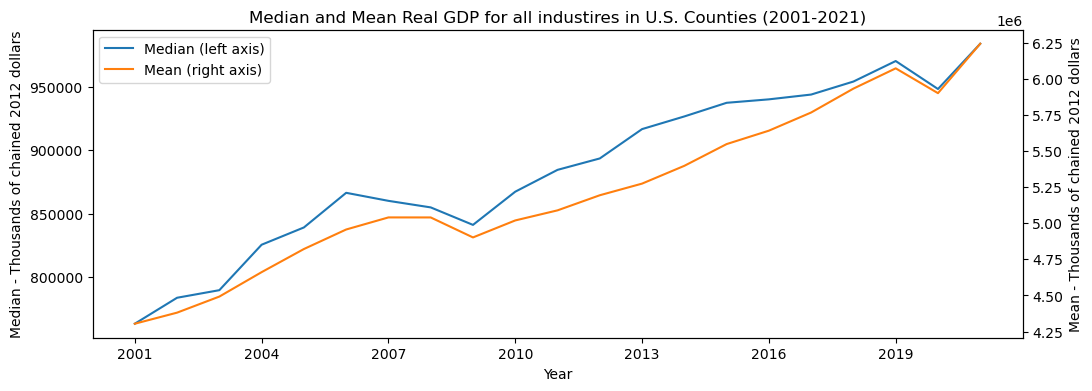

In [51]:
fig, ax1 = plt.subplots(figsize=(12, 4))

# create first plot with median
line1, = ax1.plot(rgdp_county_allindustry_median["year"], rgdp_county_allindustry_median["value"], color='C0', label="Median (left axis)")
ax1.set_xticks(np.arange(2001, 2022, 3))
ax1.set_xlabel("Year")
ax1.set_ylabel("Median - Thousands of chained 2012 dollars")
ax1.tick_params(axis='y')

# create secondary axis with mean
ax2 = ax1.twinx()
line2, = ax2.plot(rgdp_county_allindustry_mean["year"], rgdp_county_allindustry_mean["value"], color='C1', label="Mean (right axis)")
ax2.set_ylabel("Mean - Thousands of chained 2012 dollars")
ax2.tick_params(axis='y')

plt.legend(handles=[line1, line2], loc="upper left")
plt.title("Median and Mean Real GDP for all industires in U.S. Counties (2001-2021)")
plt.show()

In both graphs there is a clear increase in real GDP in the period 2001-2021. Further I find a drop both in the wake of the financial crisis in 2007 as well as the COVID-19 pandemic. 
However as seen from the plot above the the axes are very different. The meadian is only just now about to cross the $\$1M$ mark the mean in 2001 was already above $\$4M$ and is now above $\$6M$. This indicates a a right skewed distribution where a few counties – properly around the bigger cities – have a much higher real GDP than the average county.

---
## Part 7: Changes and percent changes

Analyzing raw changes and percent changes of economic data is pertinent for many economic research and studies. Pandas provides convenient methods for us to obtain raw changes and percent changes between the different rows in a dataframe easily. 

In this part, we will use [`pd.DataFrame.diff`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html) and [`pd.DataFrame.pct_change`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) methods to see how median county-level real GDP has changed in each region in U.S. during the past 20 years. We use the same regions as defined by the Bureau of Economic Analysis, as shown below. 

<img src="assets/BEA_regions_iowa_state.jpg" width="600">
</br>
<center>U.S. Bureau of Economic Analysis Regions Reference Map</center>
<center>Source: <a href="https://www.icip.iastate.edu/maps/refmaps/bea">Iowa State University</a></center>

In [52]:
bea_regions = {1: "New England", 
               2: "Mideast", 
               3: "Great Lakes", 
               4: "Plains", 
               5: "Southeast", 
               6: "Southwest", 
               7: "Rocky Mountains", 
               8: "Far West"}

**Question 7.1:** Compute the percent changes across the years of median real GDP in the Far West region (coded as 8 in the dataset). The result should have two columns `year` and `value` (containing the percent change), and be stored in `rgdp_far_west_pct_chg`. For example, in `rgdp_far_west_pct_chg`, a row with year 2002 should have a value on the same row that corresponds to the percent change in real GDP from 2001 to 2002. `rgdp_far_west_pct_chg` should not have any rows with NaN values. 

*Hint:* Consider using [`pd.DataFrame.pct_change`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html).

In [53]:
rgdp_far_west = rgdp_county_allindustry[rgdp_county_allindustry['Region'] == 8] # select relevant rows
rgdp_far_west_groupby = rgdp_far_west[['year','value']].groupby('year').median().reset_index()
rgdp_far_west_pct_chg = rgdp_far_west_groupby.copy()
rgdp_far_west_pct_chg["value"] = rgdp_far_west_pct_chg['value'].pct_change() # find the percent changes
rgdp_far_west_pct_chg = rgdp_far_west_pct_chg.dropna().reset_index(drop=True) # drop NaN values
rgdp_far_west_pct_chg

,year,value
0,2002,0.026107
1,2003,0.019649
2,2004,0.004045
3,2005,0.045252
4,2006,0.036597
5,2007,-0.007570
6,2008,0.061576
7,2009,-0.044694
8,2010,0.024304
9,2011,0.023476


In [54]:
grader.check("q7_1")

q7_1 results: All test cases passed!

Now, the numbers in the `value` column represent the percentage chances. However, their units aren't in percents (i.e. 0.01 represents 1%, not 0.01%). If we would like to convert their units to percents, we would need to multiply by 100.

Now we will make a plot for all regions. 

<!-- BEGIN QUESTION -->

**Question 7.2:** Now, we want to find the percent changes of median real GDP in each region with `pd.DataFrame.pct_change`. So, write the code that computes the percent changes of median real GDP in each region. 

*Hint:* start by copying your code from question 7.1.

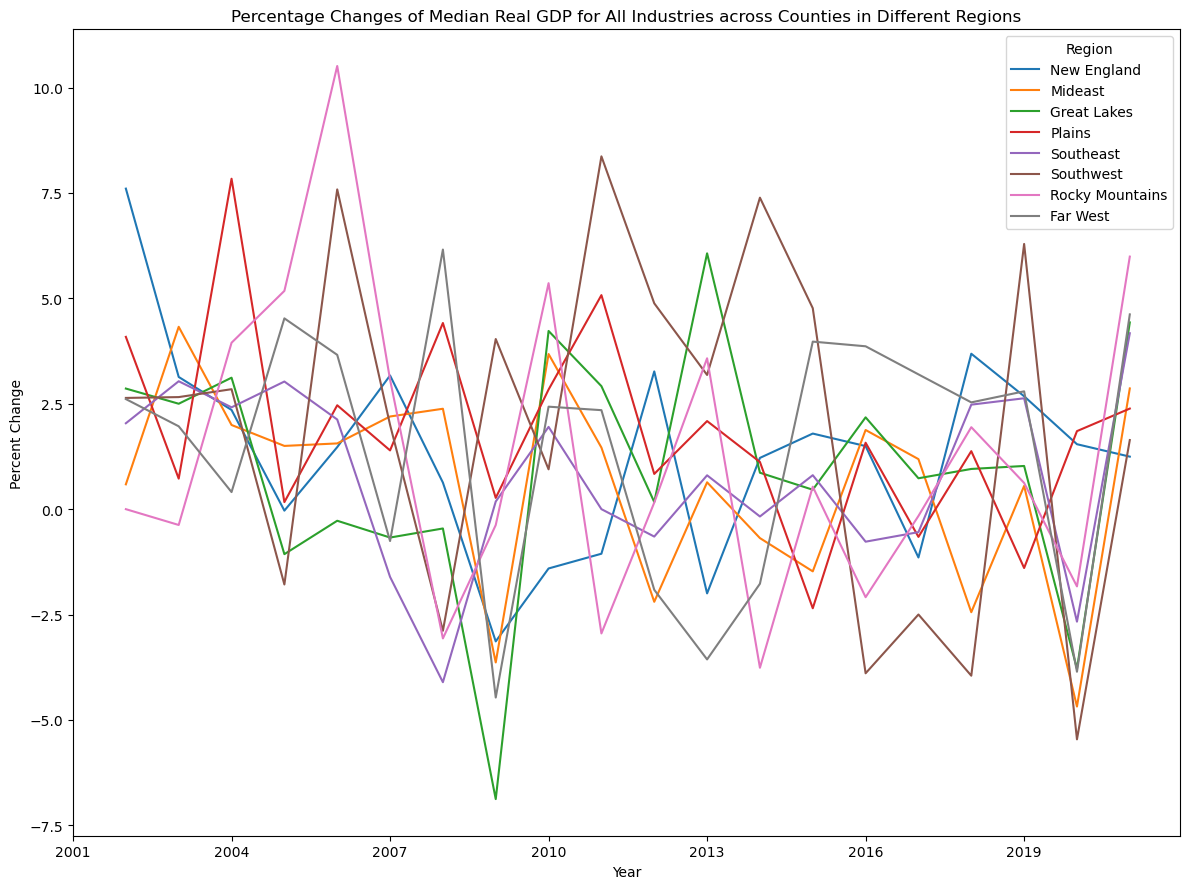

In [55]:
plt.figure(figsize=(12, 9))
for region in np.sort(rgdp_county_allindustry["Region"].unique()):
    rgdp_region_groupby = rgdp_county_allindustry[rgdp_county_allindustry['Region'] == region]
    rgdp_region_groupby = rgdp_region_groupby[['year','value']].groupby('year').median().reset_index()
    rgdp_region_pct_chg = rgdp_region_groupby.copy()
    rgdp_region_pct_chg['value'] = rgdp_region_pct_chg['value'].pct_change()
    rgdp_region_pct_chg = rgdp_region_pct_chg.dropna().reset_index(drop=True)
    plt.plot(rgdp_region_pct_chg["year"], 
             rgdp_region_pct_chg["value"] * 100, # as percentages
             label=bea_regions[region]
            )
    
plt.xticks(np.arange(2001, 2022, 3))
plt.xlabel("Year")
plt.ylabel("Percent Change")
plt.title("Percentage Changes of Median Real GDP for All Industries across Counties in Different Regions")
plt.tight_layout()
plt.legend(title="Region", loc='upper right');


<!-- END QUESTION -->

---
## Part 8: Merge

In this section, we will combine our real GDP dataframe with another dataframe that contains the geographical data of each county, so that we can make some beautiful and informative visualizations in the next section. 

First, we will import the new dataset. 

In [56]:
county_geo = pd.read_csv("data/uscounties_geo.csv")
county_geo

,county,county_ascii,county_full,county_fips,state_id,state_name,lat,lng,population
0,Los Angeles,Los Angeles,Los Angeles County,6037,CA,California,34.3209,-118.2247,10040682
1,Cook,Cook,Cook County,17031,IL,Illinois,41.8401,-87.8168,5169517
2,Harris,Harris,Harris County,48201,TX,Texas,29.8578,-95.3936,4680609
3,Maricopa,Maricopa,Maricopa County,4013,AZ,Arizona,33.3490,-112.4915,4412779
4,San Diego,San Diego,San Diego County,6073,CA,California,33.0343,-116.7350,3323970
...,...,...,...,...,...,...,...,...,...
3138,Harding,Harding,Harding County,35021,NM,New Mexico,35.8579,-103.8202,432
3139,McPherson,McPherson,McPherson County,31117,NE,Nebraska,41.5682,-101.0604,420
3140,Kenedy,Kenedy,Kenedy County,48261,TX,Texas,26.9285,-97.7017,391
3141,King,King,King County,48269,TX,Texas,33.6165,-100.2558,279


**Question 8.1:** Select only `county_fips`, `lat`, `lng`, `population` columns in the `county_geo` dataframe. 

In [57]:
county_geo = county_geo[['county_fips','lat','lng','population']]
county_geo

,county_fips,lat,lng,population
0,6037,34.3209,-118.2247,10040682
1,17031,41.8401,-87.8168,5169517
2,48201,29.8578,-95.3936,4680609
3,4013,33.3490,-112.4915,4412779
4,6073,33.0343,-116.7350,3323970
...,...,...,...,...
3138,35021,35.8579,-103.8202,432
3139,31117,41.5682,-101.0604,420
3140,48261,26.9285,-97.7017,391
3141,48269,33.6165,-100.2558,279


In [58]:
grader.check("q8_1")

q8_1 results: All test cases passed!

Learn more about GeoFIPS [here](https://en.wikipedia.org/wiki/FIPS_county_code). Note that the `county_fips` column in the new dataset represents the same information as the `GeoFIPS` column in our real GDP dataframe. So, these columns can serve as [foreign keys](https://www.cockroachlabs.com/blog/what-is-a-foreign-key/#:~:text=Foreign%20keys%20link%20data%20in,cross%2Dreferencing%20the%20two%20tables) for each other.

**Question 8.2:** Merge `rgdp_county_allindustry` with `county_geo` on GeoFIPS. No need to drop the duplicate GeoFIPS column. 

In [59]:
rgdp_county_allindustry_geo = pd.merge(left=rgdp_county_allindustry,right=county_geo,left_on='GeoFIPS',right_on='county_fips',how='inner')
rgdp_county_allindustry_geo

,GeoFIPS,GeoName,Region,LineCode,year,value,county_fips,lat,lng,population
0,1001,"Autauga, AL",5,1,2001,949800,1001,32.5349,-86.6427,55639
1,1001,"Autauga, AL",5,1,2002,984039,1001,32.5349,-86.6427,55639
2,1001,"Autauga, AL",5,1,2003,1008032,1001,32.5349,-86.6427,55639
3,1001,"Autauga, AL",5,1,2004,1170278,1001,32.5349,-86.6427,55639
4,1001,"Autauga, AL",5,1,2005,1195319,1001,32.5349,-86.6427,55639
...,...,...,...,...,...,...,...,...,...,...
64717,56045,"Weston, WY",7,1,2017,303318,56045,43.8405,-104.5678,6942
64718,56045,"Weston, WY",7,1,2018,320025,56045,43.8405,-104.5678,6942
64719,56045,"Weston, WY",7,1,2019,318723,56045,43.8405,-104.5678,6942
64720,56045,"Weston, WY",7,1,2020,292568,56045,43.8405,-104.5678,6942


In [60]:
grader.check("q8_2")

q8_2 results: All test cases passed!

---
## Part 9: Visualize the regional GDP!

Now we have cleaned up our dataset and computed the percent change of GDP for each county. It's time to use this data to show how economic performance vary across different regions! 

In [61]:
rgdp_county_allindustry_geo_chg = rgdp_county_allindustry_geo.copy()
rgdp_county_allindustry_geo_chg["value"] = rgdp_county_allindustry_geo[["value"]].pct_change()
rgdp_county_allindustry_geo_chg = rgdp_county_allindustry_geo_chg[rgdp_county_allindustry_geo_chg["year"] != 2001]
rgdp_county_allindustry_geo_chg

,GeoFIPS,GeoName,Region,LineCode,year,value,county_fips,lat,lng,population
1,1001,"Autauga, AL",5,1,2002,0.036049,1001,32.5349,-86.6427,55639
2,1001,"Autauga, AL",5,1,2003,0.024382,1001,32.5349,-86.6427,55639
3,1001,"Autauga, AL",5,1,2004,0.160953,1001,32.5349,-86.6427,55639
4,1001,"Autauga, AL",5,1,2005,0.021397,1001,32.5349,-86.6427,55639
5,1001,"Autauga, AL",5,1,2006,0.068413,1001,32.5349,-86.6427,55639
...,...,...,...,...,...,...,...,...,...,...
64717,56045,"Weston, WY",7,1,2017,-0.006967,56045,43.8405,-104.5678,6942
64718,56045,"Weston, WY",7,1,2018,0.055081,56045,43.8405,-104.5678,6942
64719,56045,"Weston, WY",7,1,2019,-0.004068,56045,43.8405,-104.5678,6942
64720,56045,"Weston, WY",7,1,2020,-0.082062,56045,43.8405,-104.5678,6942


To eliminate some outliers--some have extreme values for changes between years--we will only work with the data with GDP changes from 10th percentile to 90th percentile. The following function uses a library called [GeoPandas](https://geopandas.org/en/stable/index.html) to plot the changes for a given year and a given industry over a map of the US. 

In [62]:
def plot_counties(data, year, industry="All Industries"):
    MIN = np.nanpercentile(data["value"], 10)
    MAX = np.nanpercentile(data["value"], 90)

    rgdp_county_year = data[data["year"] == year]
    rgdp_county_year = rgdp_county_year[(rgdp_county_year["value"] < MAX) & (rgdp_county_year["value"] > MIN)]

    geometry = gpd.points_from_xy(rgdp_county_year["lng"], rgdp_county_year["lat"])
    
    gdf = gpd.GeoDataFrame(rgdp_county_year, geometry=geometry)

    fig, ax = plt.subplots(figsize=(16, 9))
    world = gpd.read_file('assets/110m_cultural/ne_110m_admin_0_countries_lakes.shp')
    world.plot(ax=ax, color='lightgrey')  # The above 2 lines are optional, they add a world map as the background
    
    plot = gdf.plot(ax=ax, marker='o', markersize=20, alpha=0.8, column='value', 
                    legend=True, cmap="coolwarm", 
                    legend_kwds={"label": "Percent Change", "shrink": 0.5, "orientation": "horizontal", "pad": 0.1})
    
    plt.title(f"Percentage Changes of Real GDP for {industry} in U.S. Counties ({year})", size=20)
    plt.xlabel("Longitude", size=16)
    plt.ylabel("Latitude", size=16)
    plt.xlim([-170, -50])
    plt.ylim([10, 70])
    plt.tight_layout()
    plt.show()

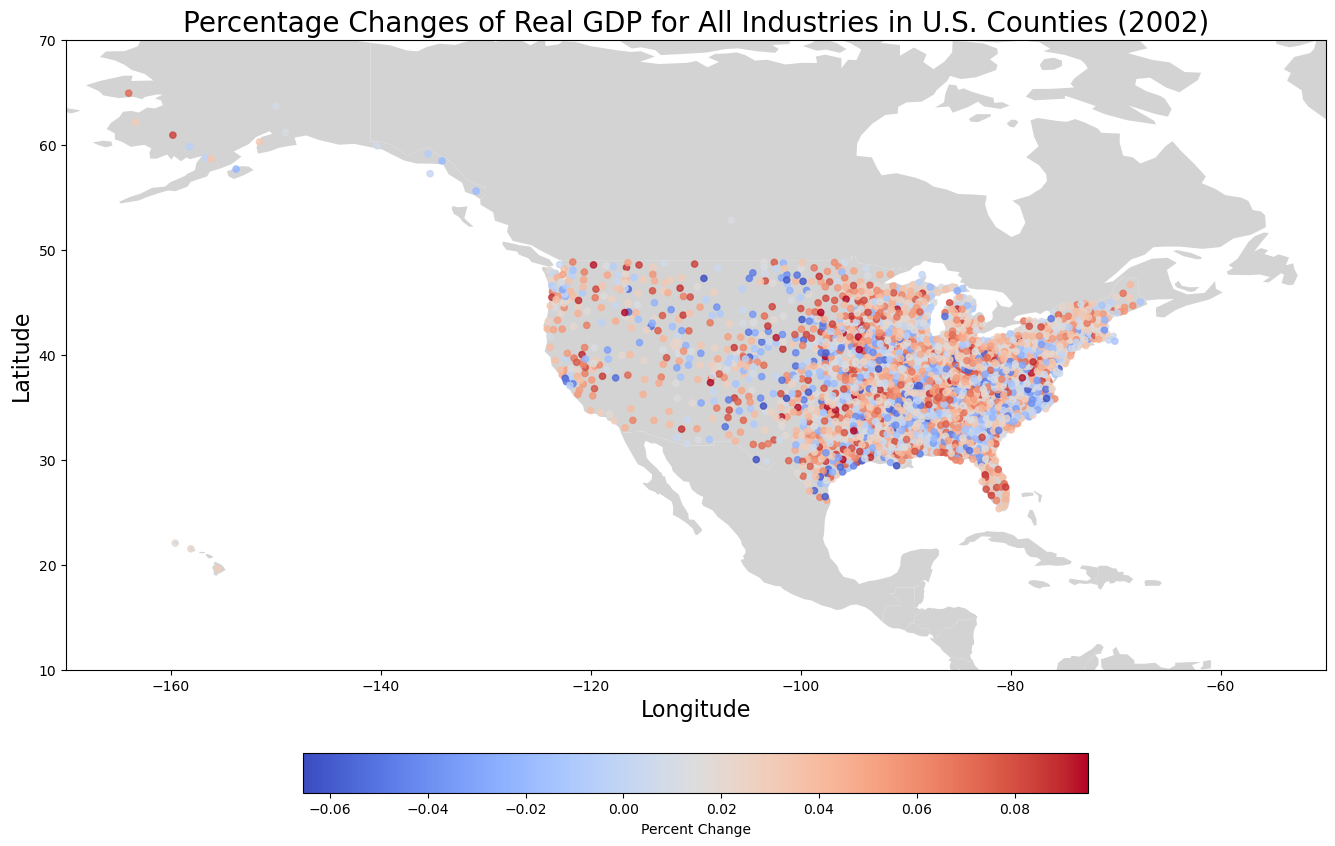

In [63]:
plot_counties(rgdp_county_allindustry_geo_chg, 2002)

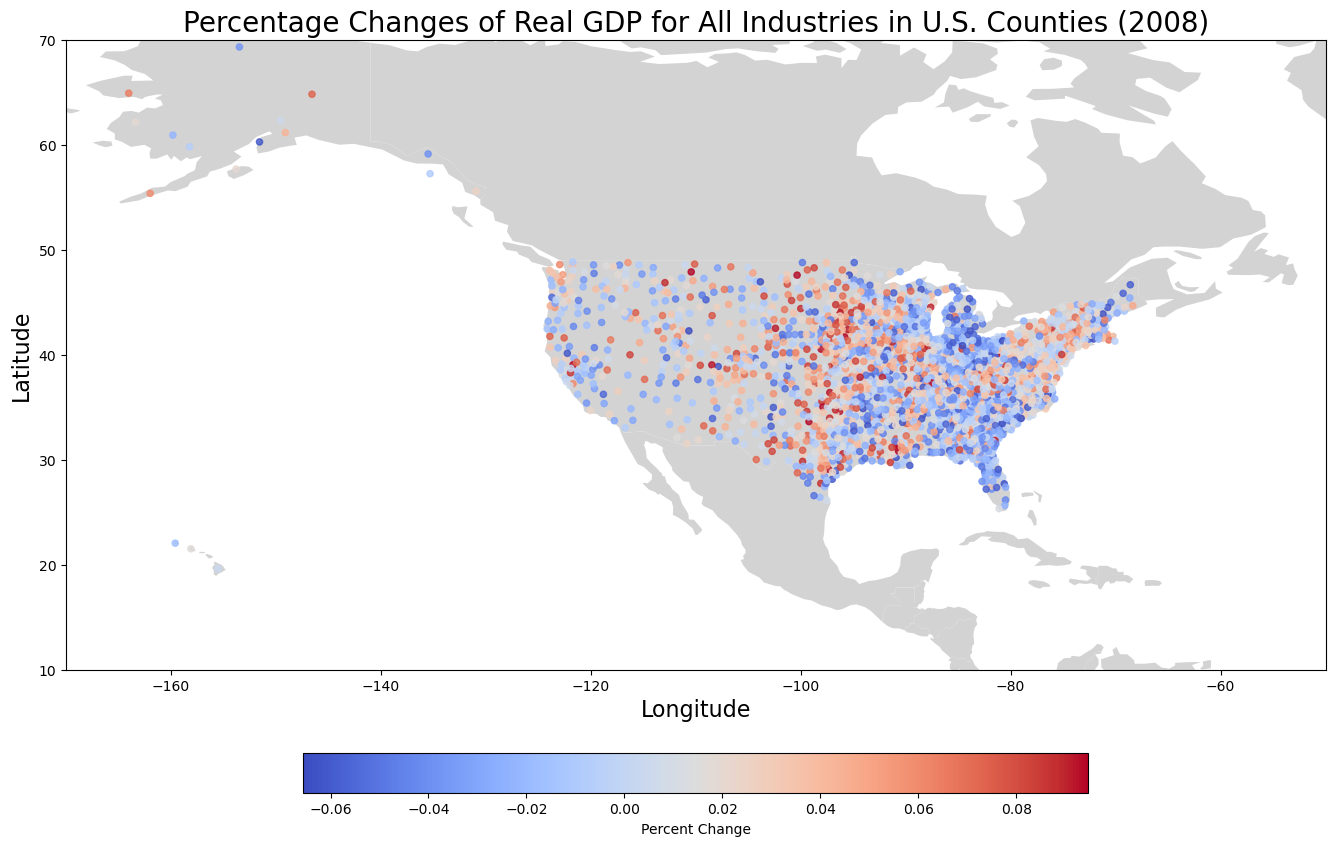

In [64]:
plot_counties(rgdp_county_allindustry_geo_chg, 2008)

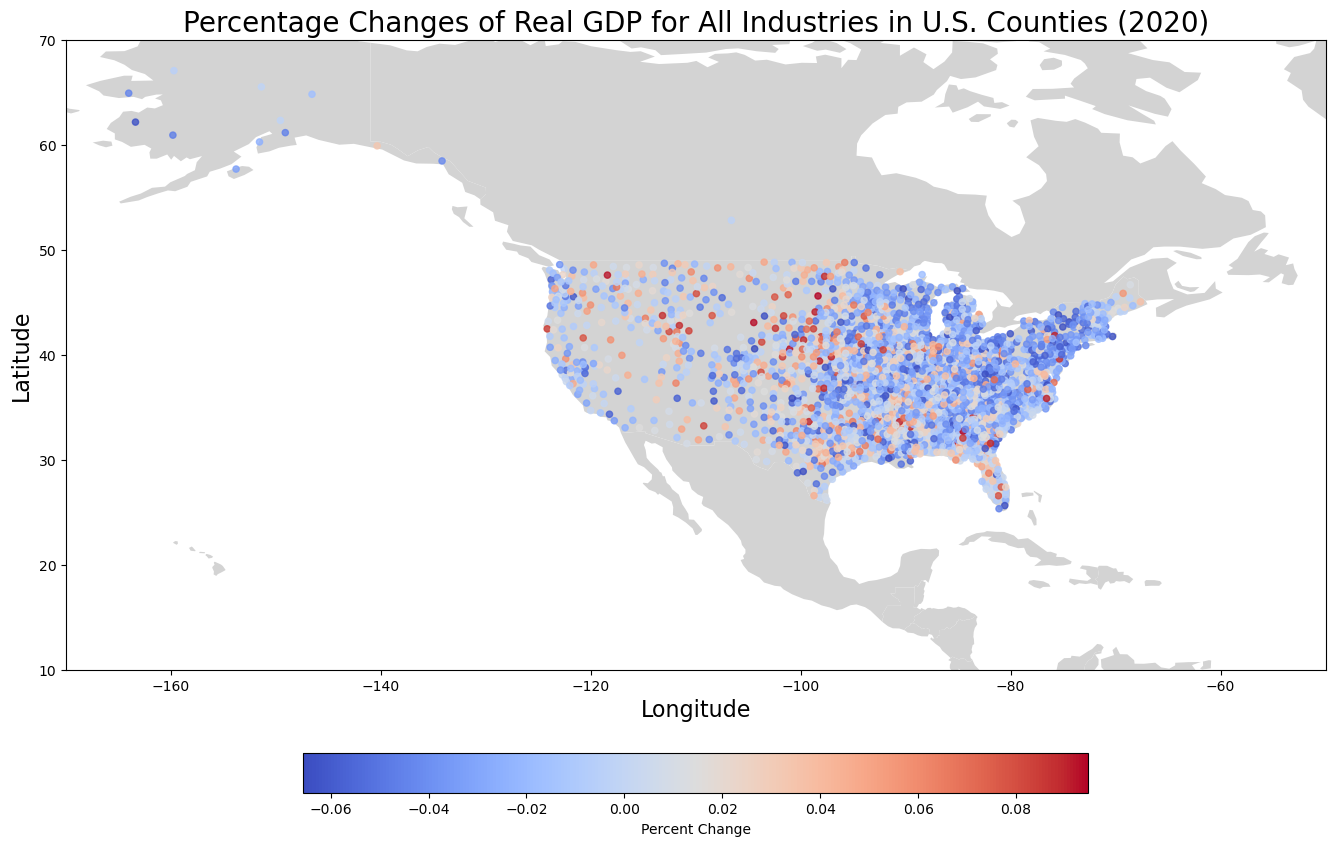

In [65]:
plot_counties(rgdp_county_allindustry_geo_chg, 2020)

<!-- BEGIN QUESTION -->

**Question 9.1:** Comment on the results above. Are the economic performance similar or different in each region? Do you find it surprising?

In **2002**, the map differentiated economic performance across the US. The distribution seems fairly even, with some experiencing growth and others experiencing a decline. There seems to be no clear tendency within each region.

In **2008** we are in the midst of the global financial crisis, and several countries are experiencing negative growth. However, interestingly, the figure shows that the _plains region_ except Minnesota, fared better than the other regions and actually were growing during this period.

Lastly, in **2020** during the first year of COVID-19, there was a general tendency of negative growth across the board. Only a few counties in the _plains_ and _rocky mountain_ regions seem to have had positive growth. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 9.2:** Let's look at the plot for 2008 that shows the regional economic performance in the midst of the Great Recession. The causes of the Great Recession include a combination of vulnerabilities that developed in the financial system, along with a series of triggering events that began with the bursting of the United States housing bubble in 2005–2012. As a sidenote, many empirical works suggest that housing crises usually accompany high levels of mortgage delinquencies (people default on their mortgage). 

Look at the [county-level change in mortgage delinquency figure](https://www.federalreserve.gov/images/bernanke20080505fig3.jpg) that was used in Ben Bernanke's (the chairman of the Federal Reserve at that time) speech [_Mortgage Delinquencies and Foreclosures_](https://www.federalreserve.gov/newsevents/speech/bernanke20080505a.htm) at the Columbia Business School's 32nd Annual Dinner in May 2008. What is the association between this mortgage delinquency graph and the regional real GDP graph we have above? How can this result potentially inform us about the causes of the Great Recession?

When comparing the plot of 2008 with the mortgage delinquency rates in the _plains region_ they seem to be average at best and not better than the _southeast region_ – except Florida – though the plains seem to have fared better when looking just isolated at the real GDP growth in 2008. Thus, this shows how there is a vast spillover effect between states as interest rates across the US went up. Not only did the states with high delinquency rates experience a tough 2008.

<!-- END QUESTION -->

We can also make some widgets! You will get more practice with this in lab 6.

In [66]:
def plot_counties_widgets(industry, year):
    rgdp_county_industry = rgdp_county[rgdp_county["Description"] == industry].drop("Description", axis=1)
    rgdp_county_industry_geo = rgdp_county_industry.merge(county_geo, left_on="GeoFIPS", right_on="county_fips")
    rgdp_county_industry_geo_chg = rgdp_county_industry_geo[rgdp_county_industry_geo["year"] != 2001].copy()
    
    pct_chg_vals = rgdp_county_industry_geo[["value"]].pct_change()
    rgdp_county_industry_geo_chg["value"] = pct_chg_vals.drop(index=np.arange(0, len(pct_chg_vals), 20), axis=0)
    
    plot_counties(rgdp_county_industry_geo_chg, year, re.sub("  ", "", industry))

In [67]:
i = widgets.Dropdown(options=rgdp_county["Description"].unique(),
                     value="All industry total", 
                     description="Industry", 
                     layout={'width': 'max-content'})

t = widgets.IntSlider(min=2002, max=2020, step=1, 
                      description="Year", 
                      layout={'width': '300px'})

interact(plot_counties_widgets, industry=i, year=t);

interactive(children=(Dropdown(description='Industry', layout=Layout(width='max-content'), options=('All indus…

**Congratulations!** You're done with Econ 148 Project 1!

---
## Feedback

**Question 10:** Please fill out this short [feedback form](https://forms.gle/DzFCYCU8cVqPn2fCA) to let us know your thoughts about this project! We really appreciate your opinions and feedback! At the end of the Google form, you should see a codeword. Assign the codeword to the variable `codeword` below. 

In [68]:
codeword = "gdp"

In [69]:
grader.check("q10")

q10 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [70]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

/Users/johanoelgaard/anaconda3/lib/python3.11/site-packages/nbconvert/utils/pandoc.py:51: RuntimeWarning: You are using an unsupported version of pandoc (3.1.11.1).
Your version must be at least (1.12.1) but less than (3.0.0).
Refer to https://pandoc.org/installing.html.
Continuing with doubts...
  check_pandoc_version()


Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q1_1 results: All test cases passed!

    q1_2 results: All test cases passed!

    q2_1 results: All test cases passed!

    q2_2 results: All test cases passed!

    q3_2 results: All test cases passed!

    q4_1 results: All test cases passed!

    q4_2 results: All test cases passed!

    q4_3 results: All test cases passed!

    q5_1 results: All test cases passed!

    q5_2 results: All test cases passed!

    q5_3 results: All test cases passed!

    q5_4 results: All test cases passed!

    q6_1 results: All test cases passed!

    q6_2 results: All test cases passed!

    q7_1 results: All test cases passed!

    q8_1 results: All test cases passed!

    q8_2 results: All test cases passed!

    q10 results: All test cases passed!
